## Example of the Proper Orthogonal Decomposition (POD) of a 1D single wave 
Test Function : 
$
y=f(x,t)= f_1(x,t)+f_2(x,t) = A_{1}\exp[-\frac{(x-x_{1})^{2}}{2\sigma_{1}^{2}}]\sin(2\pi f_{1}t)   
+A_{2}\exp[-\frac{(x-x_{2})^{2}}{2\sigma_{2}^{2}}]\sin(2\pi f_{2}t)
$

In [1]:
using LinearAlgebra, Plots;gr();default(size=(300,200))

In [2]:
# Define the dataset Y
Nx = 401
x = range(-2,2,length=Nx) #  spatial coordinate (dx = 0.01)

Nt = 201
t = range(0,2,length=Nt) # time coordinate (dt = 0.01)

A1 = 1.
x1 = 0.5
σ1 = 0.2
f1 = 1.

A2 = 2.
x2 = -1.
σ2 = 0.2
f2 = 4.

#gaussian processes
y1(x) = A1*exp(-((x-x1)^2)/(2*σ1^2))
y2(x) = A2*exp(-((x-x2)^2)/(2*σ2^2));

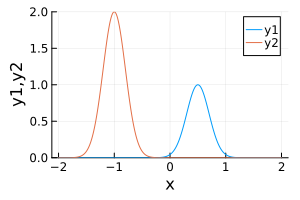

In [3]:
# plot of the two spatial bumps
plot(x,y1)
plot!(x,y2,xlabel="x",ylabel="y1,y2",ylim=(-0.001,2.))

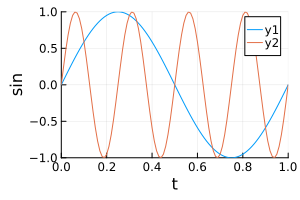

In [4]:
# plot of the two temporal dynamics
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [5]:
#  Building the two dimensional continous function f(x,t)
f_1(x,t)=A1*exp(-((x-x1)^2)/(2*σ1^2))*sin(2*π*f1*t)
f_2(x,t)=A2*exp(-((x-x2)^2)/(2*σ2^2))*sin(2*π*f2*t)
f(x,t)=f_1(x,t)+f_2(x,t)

f (generic function with 1 method)

[ Info: Saved animation to c:\Users\admin\OneDrive\Documents\Julia\ROM4SM\img\anim_f_1_fps15.gif


Plots.AnimatedGif("c:\\Users\\admin\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_f_1_fps15.gif")
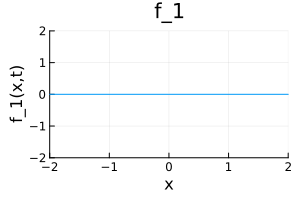

In [6]:
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f_1.(x,tt),xlim=(-2,2),title="f_1",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_1(x,t)")
end
gif(anim, "img/anim_f_1_fps15.gif", fps = 15)

[ Info: Saved animation to c:\Users\admin\OneDrive\Documents\Julia\ROM4SM\img\anim_f_2_fps15.gif


Plots.AnimatedGif("c:\\Users\\admin\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_f_2_fps15.gif")
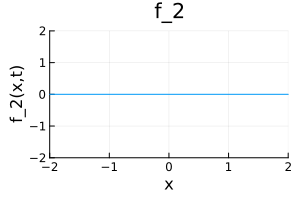

In [7]:
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f_2.(x,tt),xlim=(-2,2),title="f_2",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_2(x,t)")
end
gif(anim, "img/anim_f_2_fps15.gif", fps = 15)

[ Info: Saved animation to c:\Users\admin\OneDrive\Documents\Julia\ROM4SM\img\anim_f_fps15.gif


Plots.AnimatedGif("c:\\Users\\admin\\OneDrive\\Documents\\Julia\\ROM4SM\\img\\anim_f_fps15.gif")
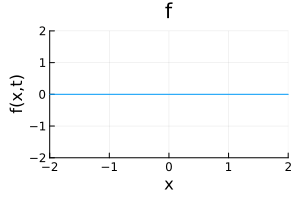

In [8]:
anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x, f.(x,tt),xlim=(-2,2),title="f",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f(x,t)")
end
gif(anim, "img/anim_f_fps15.gif", fps = 15)

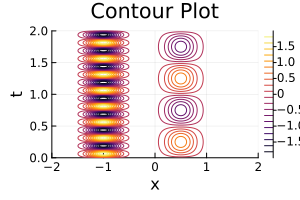

In [9]:
# 2D Contour Plot of the data matrix Y
contour(x,t,f,levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

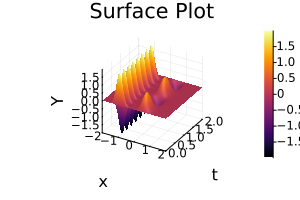

In [10]:
# 3D Surface Plot of the dataset
#my_cg = cgrad([:blue, :yellow])
surface(x,t,f, xaxis="x", yaxis="t",zaxis="Y", title="Surface Plot")

In [11]:
#  Building the discrete spatio-temporal series Y 
#Build of the spatio-temporal x vs t data matrix Y
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1.(x)*sin(2*π*f1*tt) + y2.(x)*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end
println("\rThe Data Matrix Y = \r")
Y

The Data Matrix Y = 


401×201 Matrix{Float64}:
 0.0  1.85356e-6   3.59066e-6   5.10214e-6   …  -1.85356e-6   -1.46043e-20
 0.0  2.37705e-6   4.60474e-6   6.54309e-6      -2.37705e-6   -1.87288e-20
 0.0  3.04077e-6   5.89047e-6   8.37005e-6      -3.04077e-6   -2.39583e-20
 0.0  3.88009e-6   7.51639e-6   1.06804e-5      -3.88009e-6   -3.05714e-20
 0.0  4.93873e-6   9.56715e-6   1.35944e-5      -4.93873e-6   -3.89124e-20
 0.0  6.27052e-6   1.2147e-5    1.72603e-5   …  -6.27052e-6   -4.94056e-20
 0.0  7.94156e-6   1.53841e-5   2.186e-5        -7.94156e-6   -6.25717e-20
 0.0  1.00328e-5   1.94352e-5   2.76164e-5      -1.00328e-5   -7.90487e-20
 0.0  1.26431e-5   2.44917e-5   3.48015e-5      -1.26431e-5   -9.96151e-20
 0.0  1.58927e-5   3.07868e-5   4.37464e-5      -1.58927e-5   -1.25219e-19
 0.0  1.99277e-5   3.86032e-5   5.48532e-5   …  -1.99277e-5   -1.57011e-19
 0.0  2.49247e-5   4.82833e-5   6.86081e-5      -2.49247e-5   -1.96382e-19
 0.0  3.10969e-5   6.02399e-5   8.55978e-5      -3.10969e-5   -2.45014e-19


In [12]:
# 1D Animation over the first second
#= anim=Animation()
anim = @animate for tt in range(0,1,length=100)
    plot( x,Y ,xlim=(-2,2),title="f for one second",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f(x,t)")
end
gif(anim, "img/anim_1_fps15.gif", fps = 15) =#

In [13]:
# another way to create the data matrix Y (like the matlab meshgrid function )
X = repeat(reshape(x, :, 1), 1,length(t))

401×201 Matrix{Float64}:
 -2.0   -2.0   -2.0   -2.0   -2.0   …  -2.0   -2.0   -2.0   -2.0   -2.0
 -1.99  -1.99  -1.99  -1.99  -1.99     -1.99  -1.99  -1.99  -1.99  -1.99
 -1.98  -1.98  -1.98  -1.98  -1.98     -1.98  -1.98  -1.98  -1.98  -1.98
 -1.97  -1.97  -1.97  -1.97  -1.97     -1.97  -1.97  -1.97  -1.97  -1.97
 -1.96  -1.96  -1.96  -1.96  -1.96     -1.96  -1.96  -1.96  -1.96  -1.96
 -1.95  -1.95  -1.95  -1.95  -1.95  …  -1.95  -1.95  -1.95  -1.95  -1.95
 -1.94  -1.94  -1.94  -1.94  -1.94     -1.94  -1.94  -1.94  -1.94  -1.94
 -1.93  -1.93  -1.93  -1.93  -1.93     -1.93  -1.93  -1.93  -1.93  -1.93
 -1.92  -1.92  -1.92  -1.92  -1.92     -1.92  -1.92  -1.92  -1.92  -1.92
 -1.91  -1.91  -1.91  -1.91  -1.91     -1.91  -1.91  -1.91  -1.91  -1.91
 -1.9   -1.9   -1.9   -1.9   -1.9   …  -1.9   -1.9   -1.9   -1.9   -1.9
 -1.89  -1.89  -1.89  -1.89  -1.89     -1.89  -1.89  -1.89  -1.89  -1.89
 -1.88  -1.88  -1.88  -1.88  -1.88     -1.88  -1.88  -1.88  -1.88  -1.88
  ⋮                         

In [14]:
T = repeat(reshape(t,1,:),  length(x),1)

401×201 Matrix{Float64}:
 0.0  0.01  0.02  0.03  0.04  0.05  …  1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05  …  1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05  …  1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 0.0  0.01  0.02  0.03  0.04  0.05     1.95  1.96  1.97  1.98  1.99  2.0
 ⋮                        

In [15]:
YY = map(f, X, T)

401×201 Matrix{Float64}:
 0.0  1.85356e-6   3.59066e-6   5.10214e-6   …  -1.85356e-6   -1.46043e-20
 0.0  2.37705e-6   4.60474e-6   6.54309e-6      -2.37705e-6   -1.87288e-20
 0.0  3.04077e-6   5.89047e-6   8.37005e-6      -3.04077e-6   -2.39583e-20
 0.0  3.88009e-6   7.51639e-6   1.06804e-5      -3.88009e-6   -3.05714e-20
 0.0  4.93873e-6   9.56715e-6   1.35944e-5      -4.93873e-6   -3.89124e-20
 0.0  6.27052e-6   1.2147e-5    1.72603e-5   …  -6.27052e-6   -4.94056e-20
 0.0  7.94156e-6   1.53841e-5   2.186e-5        -7.94156e-6   -6.25717e-20
 0.0  1.00328e-5   1.94352e-5   2.76164e-5      -1.00328e-5   -7.90487e-20
 0.0  1.26431e-5   2.44917e-5   3.48015e-5      -1.26431e-5   -9.96151e-20
 0.0  1.58927e-5   3.07868e-5   4.37464e-5      -1.58927e-5   -1.25219e-19
 0.0  1.99277e-5   3.86032e-5   5.48532e-5   …  -1.99277e-5   -1.57011e-19
 0.0  2.49247e-5   4.82833e-5   6.86081e-5      -2.49247e-5   -1.96382e-19
 0.0  3.10969e-5   6.02399e-5   8.55978e-5      -3.10969e-5   -2.45014e-19


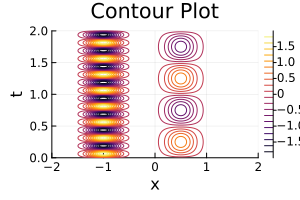

In [16]:
# 2D Contour Plot of the data matrix Y
contour(X[:,1],T[1,:],YY',levels=20)
xlabel!("x")
ylabel!("t")
title!("Contour Plot")

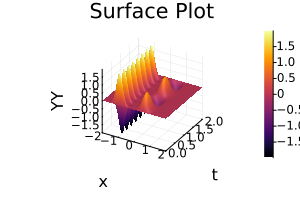

In [17]:
surface(X[:,1],T[1,:],YY', xaxis="x", yaxis="t",zaxis="YY", title="Surface Plot")

In [18]:
#= Interactive Plot 
using PlotlyJS;
trace=PlotlyJS.surface(x=x,y=t,z=Y, xlabel="x",colorscale="Viridis")
layout=PlotlyJS.Layout(title="Interactive Plot")
PlotlyJS.plot(trace,layout) =#

In [19]:
# Data decomposition with the singular value decomposition 
# U matrix (spatial Correlations); Σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(Y)

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
401×201 Matrix{Float64}:
 6.25917e-7   -6.51912e-13  -2.40208e-7   …   0.0           2.55513e-7
 8.02689e-7   -8.36175e-13   0.833441         0.000361966   0.00616404
 1.02682e-6   -1.06941e-12  -0.0462342       -0.0019253     0.0412905
 1.31024e-6   -1.36447e-12  -0.510454         0.000142444  -0.0168451
 1.66773e-6   -1.737e-12    -0.0716693       -0.00144074    0.0543978
 2.11745e-6   -2.2054e-12    0.00694852   …  -0.00225501   -0.132192
 2.68173e-6   -2.79314e-12  -0.00261777       0.00432573    0.139172
 3.38791e-6   -3.52857e-12  -0.00689428      -0.00239174   -0.234075
 4.26935e-6   -4.44664e-12   0.00214999       0.00293359    0.0507187
 5.36669e-6   -5.58949e-12   0.0108549        0.00183651    0.0230376
 6.72924e-6   -7.00864e-12  -0.0116578    …  -2.23359e-5    0.116834
 8.41665e-6   -8.76633e-12   0.0165422       -0.00355791   -0.119192
 1.05009e-5   -1.0937e-11   -0.000622414     -0.00232596   -0.136049
 ⋮ 

In [20]:
Z.S[1:5]

5-element Vector{Float64}:
 119.07825497226035
  59.5391274861175
   1.0826534619845675e-13
   4.791654595931746e-14
   3.7502766066060145e-14

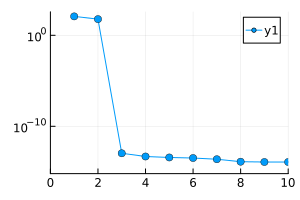

In [21]:
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics) The very good decay shows the existence of a low rank subspace =#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

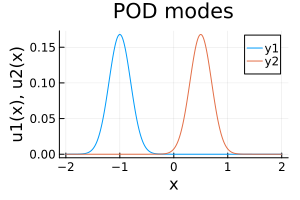

In [22]:
# Plot of the POD modes (Uj ; j={1,2}). Due to the very differents spatial scales, the POD modes extracted have a physical meanng 
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes") # Spatial modes 

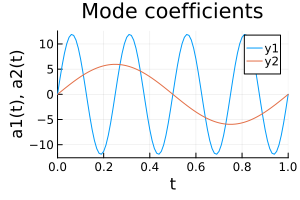

In [23]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("t");ylabel!("a1(t), a2(t)");title!("Mode coefficients") # Temporal modes

## Reduction and Reconstruction with feature extraction (two building blocks with their own dynamics are shown to exist)

In [24]:
#Animation of the POD1 mode over the first second
Y_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="x",ylabel="Y_POD1")
    j+=1
end
gif(anim, "img/anim_Y_POD1_fps15.gif", fps = 15)

LoadError: UndefVarError: `j` not defined

In [ ]:
#Animation of the POD2 mode over the first second
Y_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Y_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="x",ylabel="Y_POD2")
    j+=1
end
gif(anim, "img/anim_Y_POD2_fps15.gif", fps = 15)

In [ ]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
Yrecons=Y_POD1+Y_POD2
anim=Animation()
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, Yrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="x",ylabel="Yrecons")
    j+=1
end
gif(anim, "img/anim_Yrecons_fps15.gif", fps = 15)

In [ ]:
plot(x,t,Yrecons',st=:surface,xaxis="x", yaxis="t",zaxis="Yrecons")
title!("Reconstruction first two modes")

## Same test function but with different parameters in order to mix alltogether the different scales

In [ ]:
A1 = 1.25
x1 = 0.25
σ1 = 0.4
f1 = 2.

A2 = 1.5
x2 = -0.25
σ2 = 0.2
f2 = 3.

#gaussian processes
yn1(x) = A1*exp(-((x-x1).^2)/(2*σ1^2))
yn2(x) = A2*exp(-((x-x2).^2)/(2*σ2^2));

In [ ]:
plot(x,yn1)
plot!(x,yn2,xlabel="x",ylabel="yn1,yn2")

In [ ]:
plot(t,sin.(2*π*f1*t))
plot!(t,sin.(2*π*f2*t),xlabel="t",ylabel="sin",xlim=(0,1),ylim=(-1,1))

In [ ]:
#  Building the two dimensional continous function f(x,t)
fn_1(x,t)=A1*exp(-((x-x1)^2)/(2*σ1^2))*sin(2*π*f1*t)
fn_2(x,t)=A2*exp(-((x-x2)^2)/(2*σ2^2))*sin(2*π*f2*t)
fn(x,t)=f_1(x,t)+f_2(x,t)

In [ ]:
anim = @animate for tt in range(0,1,length=100)
    plot( x, fn_1.(x,tt),xlim=(-2,2),title="fn_1 for one second",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_1(x,t)")
end
gif(anim, "img/anim_fn_1_fps15.gif", fps = 15)

In [ ]:
anim = @animate for tt in range(0,1,length=100)
    plot( x, fn_2.(x,tt),xlim=(-2,2),title="fn_2 for one second",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f_2(x,t)")
end
gif(anim, "img/anim_fn_2_fps15.gif", fps = 15)

In [ ]:
anim = @animate for tt in range(0,1,length=100)
    plot( x, fn.(x,tt),xlim=(-2,2),title="fn for one second",leg=false,ylim=(-2.,2.),xlabel="x",ylabel="f(x,t)")
end
gif(anim, "img/anim_fn_fps15.gif", fps = 15)

In [ ]:
YN = zeros(Nx,Nt)
j=1
for tt in t
    YN[:,j] = yn1.(x)*sin(2*π*f1*tt) + yn2.(x)*sin(2*π*f2*tt) # gaussian processes 
    j+=1                                           # with their temporal dynamics
end

In [ ]:
# Data decomposition with the singular value decomposition 
# U matrix (spatial Correlations); σ matrix (weighting of projections), Vt (time dynamics) 
Z=svd(YN)
#= plot of the singular values (see the  two most dominants features due to the two ranks dataset 
(the two bumps with their temporal dynamics). Again The very good decay shows the existence of a low rank subspace=#
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

In [ ]:
#= Plot of the POD modes (Uj ; j={1,2})The POD modes are not so physical, 
a kind of blending of the bumps occurs due to the greedy nature of the SVD algorithm =#
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

In [ ]:
#plot of the Mode coefficents (σjVtj ; j={1,2]})
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 1))
plot!(t,Z.S[2]*Z.Vt[2,:],xlim=(0, 1))
xlabel!("Time");ylabel!("a1(t), a2(t)");title!("Mode coefficients")

## Features Extraction (less good results no?)

In [ ]:
#Animation of the POD1 mode over the first second
YN_POD1=Z.U[:,1]*Z.S[1]*Z.Vt[1,:]'
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, YN_POD1[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD1 mode",xlabel="x",ylabel="Y_POD1")
    j+=1
end
gif(anim, "img/anim_YN_POD1_fps15.gif", fps = 15)

In [ ]:
#Animation of the POD2 mode over the first second
YN_POD2=Z.U[:,2]*Z.S[2]*Z.Vt[2,:]'
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, YN_POD2[:,j],leg=false,xlim=(-2,2),ylim=(-2.,2.),title="POD2 mode",xlabel="x",ylabel="Y_POD2")
    j+=1
end
gif(anim, "img/anim_YN_POD2_fps15.gif", fps = 15)

In [ ]:
#Animation of Yrecons = Y_POD1+YPOD2 over the firt second
YNrecons=YN_POD1+YN_POD2
j=1
anim = @animate for tt in range(0.01,1,length=100)
    plot( x, YNrecons[:,j],xlim=(-2,2),leg=false,ylim=(-2.,2.),title="Reconstruction of Y based \n on the first two modes",xlabel="Space x",ylabel="Yrecons")
    j+=1
end
gif(anim, "img/anim_YNrecons_fps15.gif", fps = 15)

## What about  the dynamic mode decomposition (DMD) or robust DMD (rDMD) data-driven methods or even POD method coupled with the discrete empirical interpolation method (DEIM) for non linear reduction  